
Testing: t1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


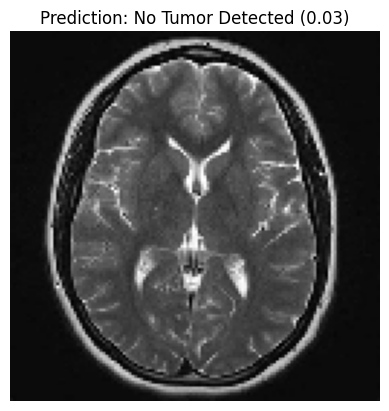


Testing: t2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


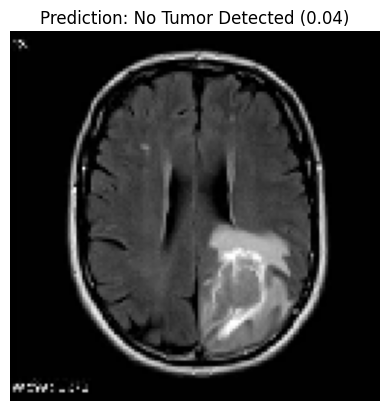


Testing: t3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


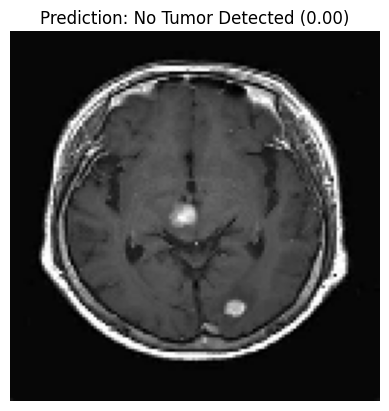


Testing: t4.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


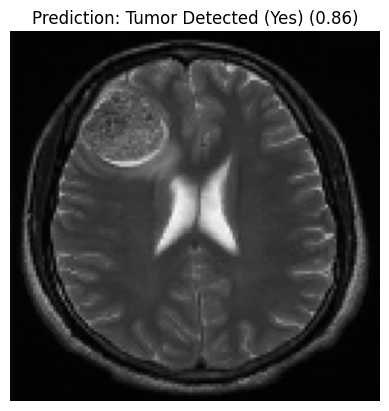

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os


model = load_model('cnn_model.h5')


IMG_SIZE = (128, 128)
test_dir = 'dataset/test'  

def load_and_predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "Tumor Detected (Yes)" if prediction >= 0.5 else "No Tumor Detected"
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label} ({prediction:.2f})")
    plt.show()

for img_file in os.listdir(test_dir):
    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        print(f"\nTesting: {img_file}")
        load_and_predict_image(os.path.join(test_dir, img_file))
